In [ ]:
from fastai.core import *

In [ ]:
test_df = pd.read_csv("../data/test.csv")
sub_df = pd.read_csv("../data/submission.csv")

In [ ]:
test_df['selected_text'] = sub_df['selected_text']

In [ ]:
test_df

,textID,text,sentiment,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,exciting
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,shame!
3,01082688c6,happy bday!,positive,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,I like it!!
...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,tired
3530,416863ce47,All alone in this old house again. Thanks for...,positive,Thanks
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,depression...
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,I love your videos!


In [ ]:
for text, selected_text, sent in zip(test_df['text'], test_df['selected_text'], test_df['sentiment']):
    if sent != 'neutral':

        i = text.find(selected_text)
        selected_text_set = set(selected_text.split())
        text_set = set(text[i:].split())
        
        for w in selected_text_set:
            if w not in text_set:
                break

In [ ]:
selected_text_set

{'bby.!', 'cute', 'ng'}

In [ ]:
text_set

{'bby.!', 'cute', 'ng'}

In [ ]:
(0.698436 + 0.692732 + 0.691364 + 0.695767 + 0.706681) /5

0.6969960000000001

### backward

In [ ]:
from fastai.vision import *

In [ ]:
y = 4
x = 2

In [ ]:
# y = x**2
x1 = torch.randn(100)
y1 = x1**2 

In [ ]:
# y = -(x-5)**2 
x2 = torch.randn(100)+2
y2 = (-(x2-2)**2 ) + 5 

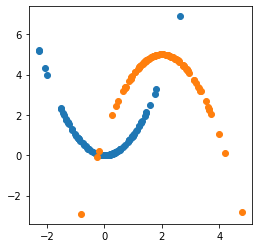

In [ ]:
axes = subplots(1,1)
axes[0][0].scatter(x1,y1)
axes[0][0].scatter(x2,y2)

In [ ]:
def loss_fn(y_hat, y): return torch.sqrt(((y_hat - y)**2).mean())

In [ ]:
class SimpleNet(Module):
    def __init__(self):
        self.lin0 = nn.Linear(1,1)
        self.lin1 = nn.Linear(1,1)
        self.lin2 = nn.Linear(1,1)
    
    def forward(self,x): 
        return self.lin2(F.relu(self.lin1(F.relu(self.lin0(x)))))

In [ ]:
model = SimpleNet()

In [ ]:
xs = torch.cat([x1,x2]).view(-1,1)
ys = torch.cat([y1,y2]).view(-1,1)

In [ ]:
lr = 0.001
for i in range(100):
    loss = loss_fn(model(xs), ys)
    print(loss.item())
    loss.backward()
    for p in model.parameters(): p.data.add_(-lr*p.grad)
    for p in model.parameters(): p.grad.zero_()

2.026779890060425
2.026779890060425
2.026779890060425
2.026779890060425
2.026779890060425
2.0267796516418457
2.026779890060425
2.026779890060425
2.026779890060425
2.026779890060425
2.026779890060425
2.026779890060425
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.026779890060425
2.026779890060425
2.026779890060425
2.026779890060425
2.0267796516418457
2.026779890060425
2.0267796516418457
2.026779890060425
2.026779890060425
2.0267796516418457
2.0267796516418457
2.026779890060425
2.0267796516418457
2.026779890060425
2.026779890060425
2.026779890060425
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.026779890060425
2.0267796516418457
2.026779890060425
2.026779890060425
2.026779890060425
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.026779890060425
2.0267796516418457
2.026779890060425
2.0267796516418457
2.0267796516418457
2.0267796516418457
2.

In [ ]:
yhats = model(xs).view(-1).detach()

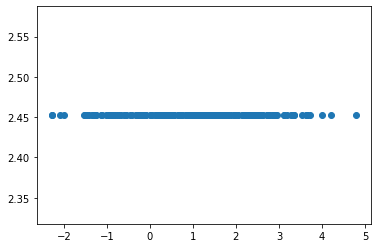

In [ ]:
plt.scatter(xs, yhats)